# Thompson Sampling Algorithm

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

### Implementing Thompson Sampling

In [3]:
import random
N = 1000                            # Total No. of Users to whom the Ads are displayed
d = 10                              # Total No. of different Ads
ads_selected = []                   # List of the Ads Selected by the Users at each round
numbers_of_rewards_1 = [0] * d      # List of the number of times each Ad got reward 1 up to round n
numbers_of_rewards_0 = [0] * d      # List of the number of times each Ad got reward 0 up to round n
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_beta > max_random):
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if (reward == 1):
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

### Visualising the results

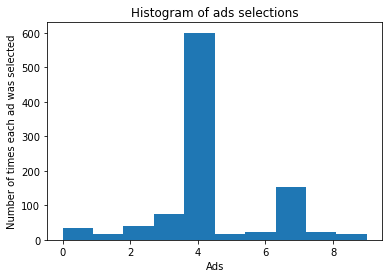

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()